In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv

# Silence Warnings
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [2]:
df = pd.read_csv("Student_performance_data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
df = df.astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   float64
 1   Age                2392 non-null   float64
 2   Gender             2392 non-null   float64
 3   Ethnicity          2392 non-null   float64
 4   ParentalEducation  2392 non-null   float64
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   float64
 7   Tutoring           2392 non-null   float64
 8   ParentalSupport    2392 non-null   float64
 9   Extracurricular    2392 non-null   float64
 10  Sports             2392 non-null   float64
 11  Music              2392 non-null   float64
 12  Volunteering       2392 non-null   float64
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(15)
memory usage: 280.4 KB


In [6]:
df['GPA'].value_counts()

GPA
0.000000    16
4.000000     7
2.929196     1
2.527607     1
2.167615     1
            ..
1.687900     1
2.952146     1
0.963375     1
3.334972     1
2.140014     1
Name: count, Length: 2371, dtype: int64

In [7]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

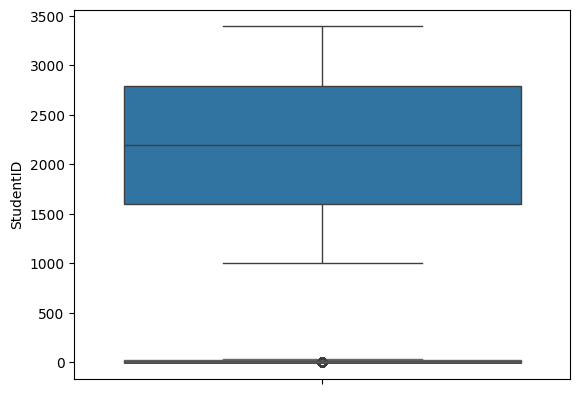

In [8]:
for col in df.columns:
    sns.boxplot(df[col])

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

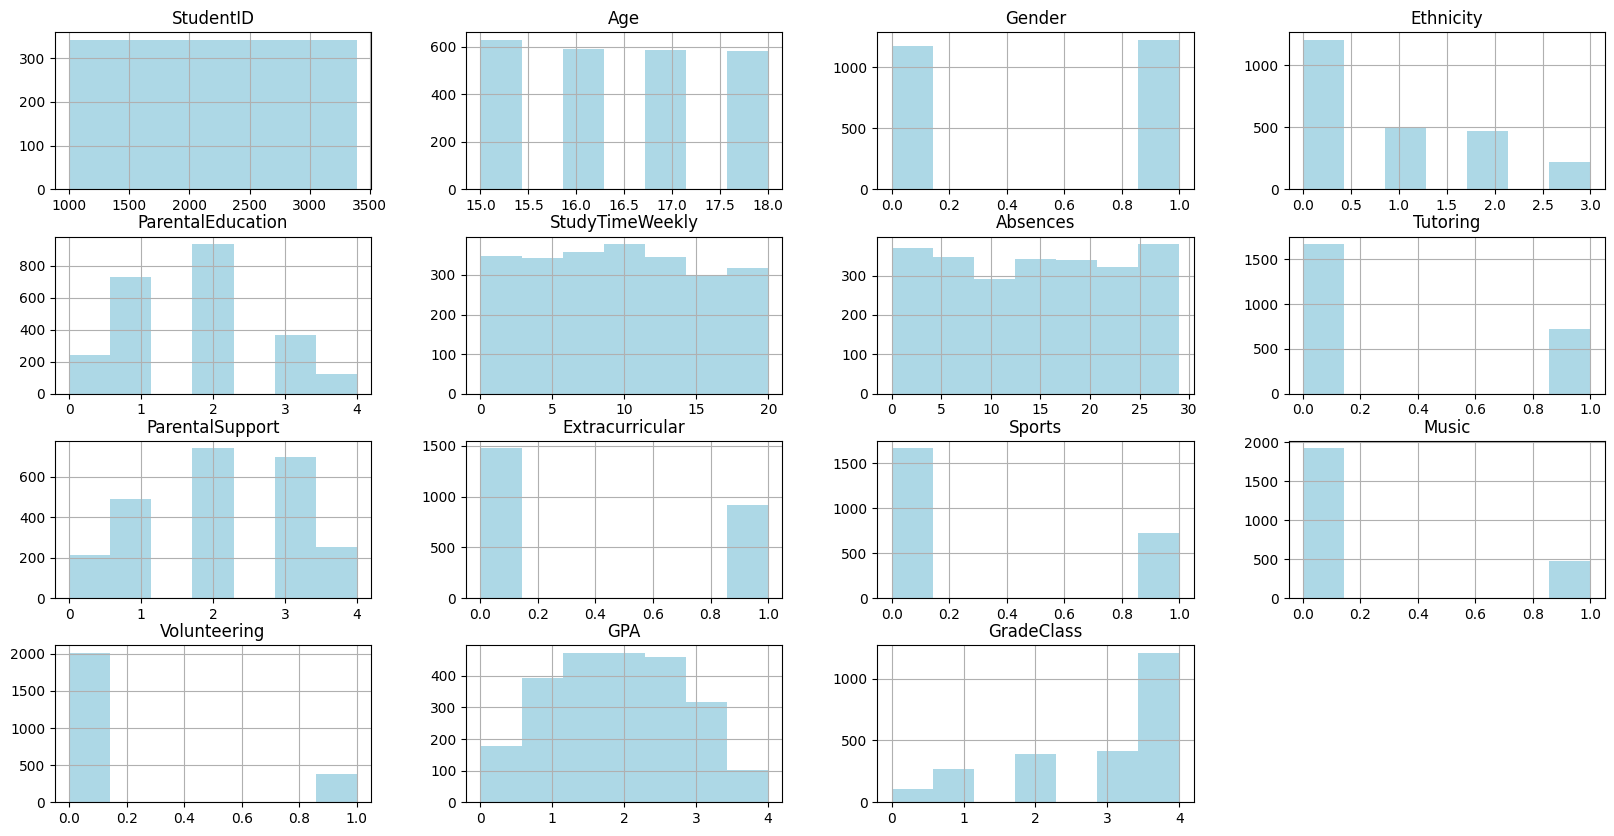

In [9]:
df.hist(figsize=(20,10),bins=7, color='lightblue')

In [10]:
columns = list(df.columns)

numeric = []
categorical = []

for i in columns:
    if len(df[i].unique())>5:
        numeric.append(i)
    else:
        categorical.append(i)

print("Numerical features:", numeric)
print("Categorical features:", categorical)

Numerical features: ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']
Categorical features: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [11]:
df[numeric] = df[numeric].astype('float64')

In [12]:
label_encoder = LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categorical]:  
    df[column] = label_encoder.fit_transform(df[column])

# Standardize numerical features
scaler = StandardScaler()
df[numeric] = scaler.fit_transform(df[numeric])

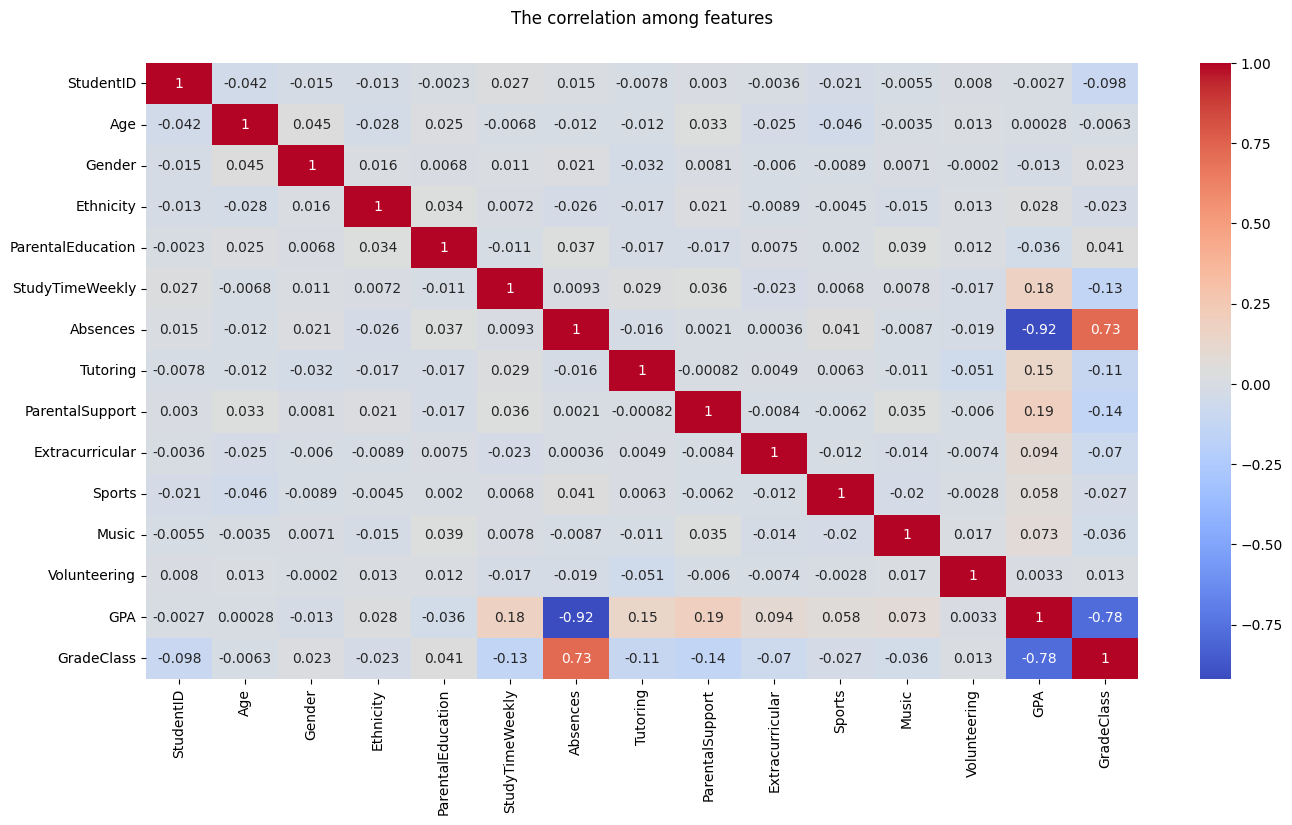

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

In [14]:
# CHOOSE THE TARGET FEATURE HERE, IN THIS CASE IT IS 'GradeClass'
X = df.drop(columns=['GradeClass', 'GPA', 'StudentID', 'Age'])
y = df['GradeClass']

# Splitting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(X, y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

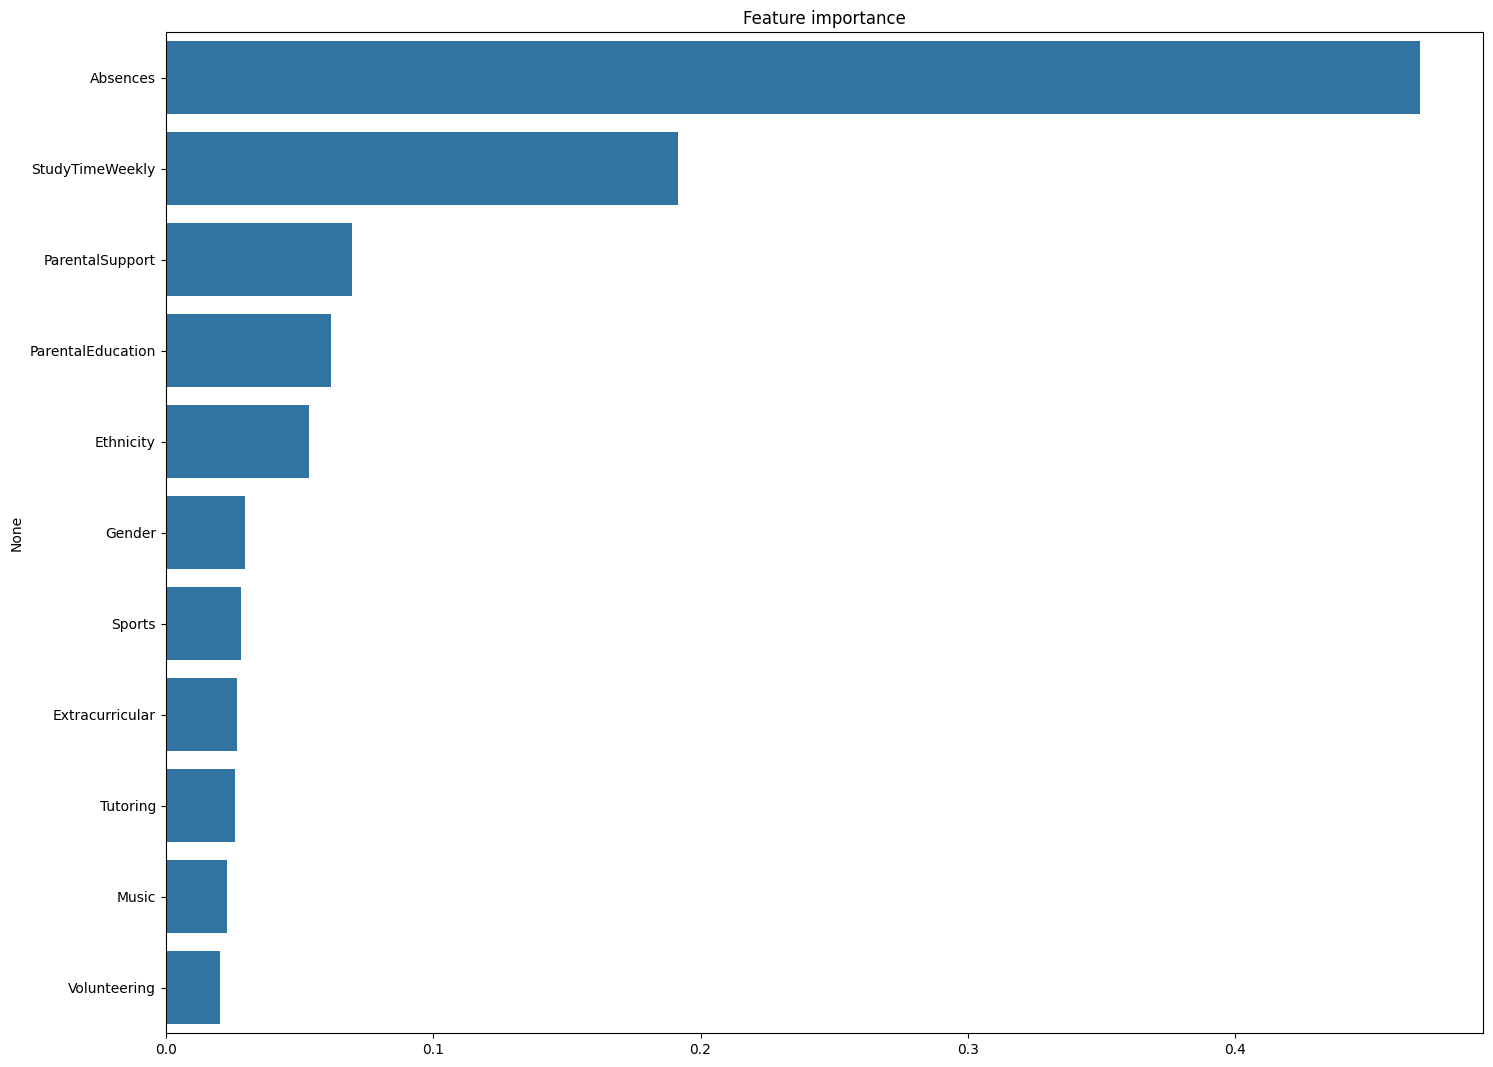

In [16]:
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

In [17]:
# Dictionary of classification models
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.73
K-Nearest Neighbors accuracy: 0.65
Support Vector Machine accuracy: 0.75
Decision Tree accuracy: 0.57
Random Forest accuracy: 0.70
Gradient Boosting accuracy: 0.69
AdaBoost accuracy: 0.66
Gaussian Naive Bayes accuracy: 0.68
XGBoost accuracy: 0.67
CatBoost accuracy: 0.70


In [18]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:.2f}")

The best model is: Support Vector Machine with an accuracy of 0.75


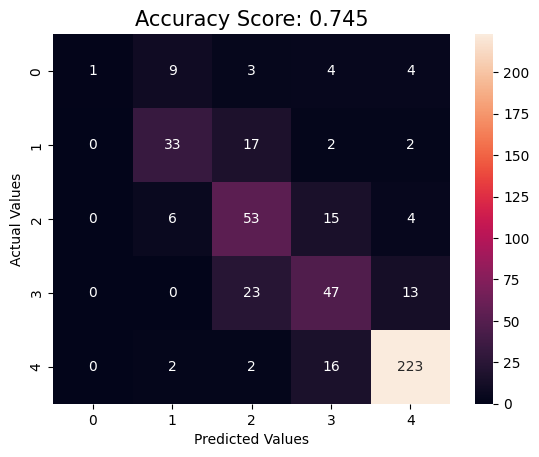

In [19]:
# Initialize and train model
best_model.fit(X_train, y_train)
model_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

In [20]:
# Define the model
model = SVC()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define grid
grid = {'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['rbf']
       }

# Define search
search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit search to training data
result = search.fit(X_train, y_train)

# Summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.751517961023851
Best Hyperparameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


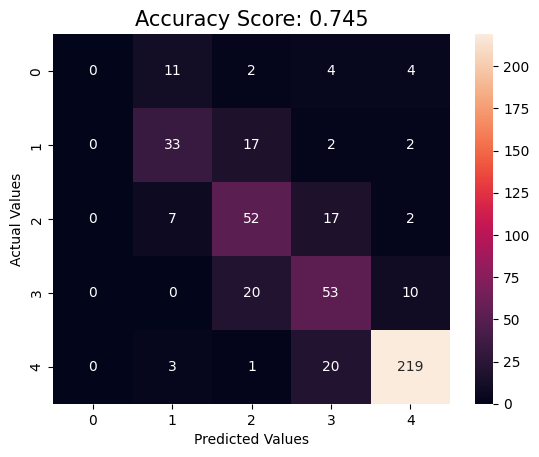

In [21]:
# Initialize and train model
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

In [22]:
fimp.head(3)

Absences           0.469150
StudyTimeWeekly    0.191713
ParentalSupport    0.069698
dtype: float64

In [23]:
X_train = X_train[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]
X_test = X_test[['Absences', 'StudyTimeWeekly', 'ParentalSupport']]

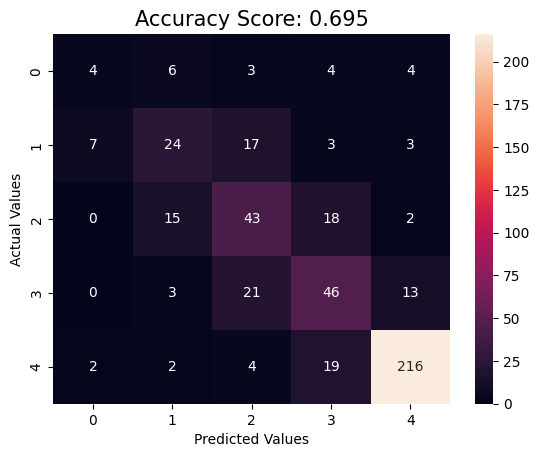

In [24]:
# Define Model
model = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)

# Fit search to new training data
result = model.fit(X_train, y_train)

# Initialize and train model
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

In [29]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Create LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode="regression", feature_names=X_train.columns)

In [30]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Has diabetes', 'No diabetes']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

In [ ]:
np.random.seed(123)
predict_fn = lambda x: model.predict_proba(x)
# Defining the LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(df[features.columns].astype(int).values,                                               mode='classification',
class_names=['Did not Churn', 'Churn'],                                                 training_labels=df['Churn'],                                                  feature_names=features.columns)
# using LIME to get the explanations
i = 5
exp=explainer.explain_instance(df.loc[i,features.columns].astype(int).values, predict_fn, num_features=5)
exp.show_in_notebook(show_table=True)

In [ ]:
explanation = explainer.explain_instance(X_observation.values[0], model.predict)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)